In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from sklearn import datasets
from sklearn import manifold

%matplotlib inline 

In [2]:
data = datasets.fetch_openml(
                            name='mnist_784',
                            version=1,
                            return_X_y=True

)


In [3]:
pixel_values, targets = data 

In [4]:
targets = targets.astype(int)

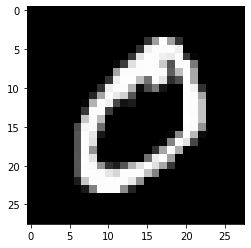

In [5]:
single_image = pixel_values[1,:].reshape(28,28)

plt.imshow(single_image, cmap='gray')

In [7]:
tsne = manifold.TSNE(n_components=2, random_state=42)
transformed_data = tsne.fit_transform(pixel_values[:3000, :])

In [14]:
tsne_df = pd.DataFrame(
    np.column_stack((transformed_data, targets[:3000])),
    columns=["x", "y", "targets"])

tsne_df.loc[:, "targets"] = tsne_df.targets.astype(int)  
print(tsne_df)  

              x          y  targets
0     -9.742266 -28.548525        5
1    -25.476608 -66.111008        0
2    -39.992714  32.707321        4
3     46.730042  29.864080        1
4    -14.279590  30.505270        9
...         ...        ...      ...
2995   7.804153  57.550777        7
2996 -30.780024 -60.130802        0
2997  11.244629  46.150650        9
2998  10.057817   5.196018        1
2999  -6.357048  -7.602555        5

[3000 rows x 3 columns]


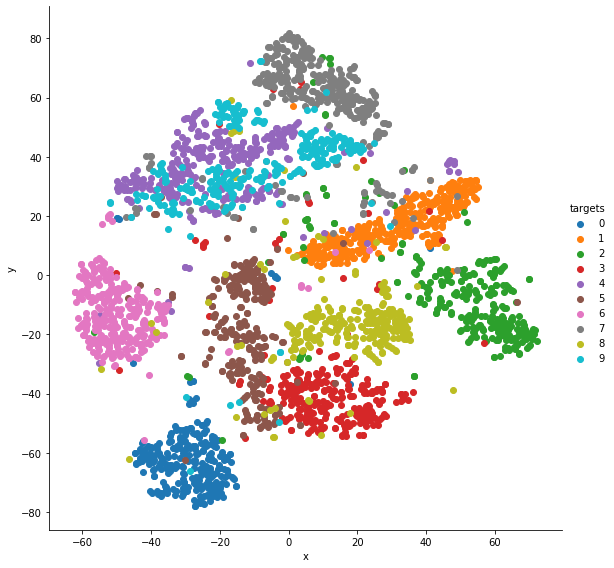

In [13]:
grid = sns.FacetGrid(tsne_df, hue = "targets", size= 8)
grid.map(plt.scatter, "x", "y").add_legend()